In [1]:
import numpy as np
import matplotlib.pyplot as plt
from multiprocessing import Pool
import pickle as pkl

from tqdm import tqdm
from importlib import reload

import utils.policies as polc
import utils.experiment as expt
import utils.plotter as pltutils
import utils.sweeper as swpr

reload(polc)
reload(expt)
reload(swpr)
reload(pltutils);

In [2]:
save_directory = './results/regret-sweep' # will not save if set to None
# save_directory = None

network_type = 'single-user'
arrival_rate_scaling_list = [1/3, 2/3, 1] if network_type == 'multi-user' else [1/3, 1.575/3, 2/3] 
# arrival_rate_scaling_list = [1.575/3] 
noise_variances_list = [0, 0.01, 0.05, 0.1]

pooled_sweep_args = []
for arrival_rate_scaling in arrival_rate_scaling_list:
    for noise_variance in noise_variances_list:
        pooled_sweep_args.append((network_type, arrival_rate_scaling, noise_variance, save_directory))
print(pooled_sweep_args)

[('single-user', 0.525, 0, './results/regret-sweep'), ('single-user', 0.525, 0.01, './results/regret-sweep'), ('single-user', 0.525, 0.05, './results/regret-sweep'), ('single-user', 0.525, 0.1, './results/regret-sweep')]


In [3]:
np.random.seed(13)

# for args in pooled_sweep_args:
#     swpr.perform_regret_experiment(args)

if __name__ == '__main__':
    with Pool() as pool:
        print('Number of processes = ' + str(pool._processes))
        list(tqdm(pool.imap(swpr.perform_regret_experiment, pooled_sweep_args), total=len(pooled_sweep_args)))
        # pool.imap(swpr.perform_regret_experiment, pooled_sweep_args)
        pool.close(); pool.join()

Number of processes = 10


  0%|          | 0/4 [00:00<?, ?it/s]/Users/sathwikchadaga/MIT Dropbox/Sathwik Chadaga/MIT/Research/Learning DPOP/Simulations/Optimistic-DPP-Improved-Regret/utils/network.py:121: RuntimeWarning: divide by zero encountered in matmul
  self.planned_tran_cost_at_tt[self.tt] = np.mean(np.sum(planned_edge_rates, axis=1)@self.true_edge_costs, axis=0)
/Users/sathwikchadaga/MIT Dropbox/Sathwik Chadaga/MIT/Research/Learning DPOP/Simulations/Optimistic-DPP-Improved-Regret/utils/network.py:121: RuntimeWarning: overflow encountered in matmul
  self.planned_tran_cost_at_tt[self.tt] = np.mean(np.sum(planned_edge_rates, axis=1)@self.true_edge_costs, axis=0)
/Users/sathwikchadaga/MIT Dropbox/Sathwik Chadaga/MIT/Research/Learning DPOP/Simulations/Optimistic-DPP-Improved-Regret/utils/network.py:121: RuntimeWarning: invalid value encountered in matmul
  self.planned_tran_cost_at_tt[self.tt] = np.mean(np.sum(planned_edge_rates, axis=1)@self.true_edge_costs, axis=0)
/Users/sathwikchadaga/MIT Dropbox/Sathwi

Arrival rate scaling = 0.525, noise variance = 0
True costs = [0.2 0.5 0.1 0.1 0.2 0.1 0.1 0.1 0.1 0.1 0.1 0.3 0.3 0.1 0.1]
Mean observed costs = [0.2 0.5 0.1 0.1 0.2 0.1 0.1 0.1 0.1 0.1 0.1 0.3 0.3 0.1 0.1]
backlog_cost_C_B = 2.9
Fit co-effs [1 sqrt(T)log(T)] = [196.699   0.507]
 
Arrival rate scaling = 0.525, noise variance = 0.01
True costs = [0.2 0.5 0.1 0.1 0.2 0.1 0.1 0.1 0.1 0.1 0.1 0.3 0.3 0.1 0.1]
Mean observed costs = [0.2   0.497 0.1   0.1   0.2   0.1   0.1   0.101 0.101 0.101 0.1   0.299
 0.303 0.1   0.098]
backlog_cost_C_B = 2.9
Fit co-effs [1 sqrt(T)log(T)] = [874.494   0.327]
 
Arrival rate scaling = 0.525, noise variance = 0.05
True costs = [0.2 0.5 0.1 0.1 0.2 0.1 0.1 0.1 0.1 0.1 0.1 0.3 0.3 0.1 0.1]
Mean observed costs = [0.201 0.497 0.101 0.101 0.2   0.1   0.1   0.1   0.101 0.098 0.1   0.303
 0.302 0.099 0.101]
backlog_cost_C_B = 2.9
Fit co-effs [1 sqrt(T)log(T)] = [2192.672    0.216]
 
Arrival rate scaling = 0.525, noise variance = 0.1
True costs = [0.2 0.5 0.1 0.1 

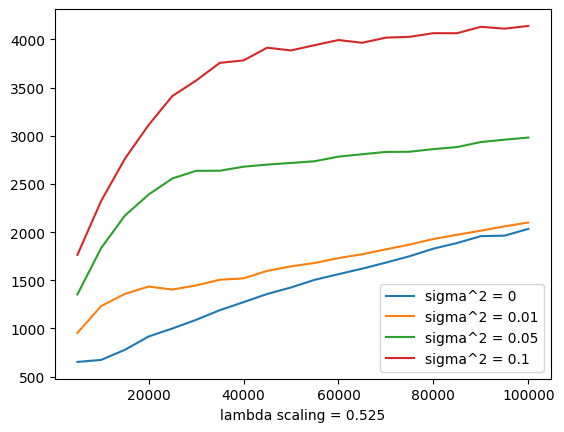

In [4]:
for arrival_rate_scaling in arrival_rate_scaling_list:
    for noise_variance in noise_variances_list:
        with open(save_directory + '/' + network_type + '/regret-lambda-' + ('%.3f'%(arrival_rate_scaling)).replace('.','_') + '-var-' + str(noise_variance).replace('.','_') + '.pkl', 'rb') as f: 
            current_result = pkl.load(f)   

        dpop_tran_costs =  current_result['dpop_tran_costs']
        dpop_backlogs = current_result['dpop_backlogs']
        backlog_cost_C_B = current_result['C_L']
        stat_costs = current_result['stat_costs']
        T_horizon_list = current_result['T_horizon_list']
        true_edge_costs = current_result['true_edge_costs']
        example_edge_cost_means = current_result['example_edge_cost_means']

        # print summary
        print('Arrival rate scaling = ' + str(arrival_rate_scaling) + ', noise variance = ' + str(noise_variance))
        print('True costs = ' + str(true_edge_costs))
        print('Mean observed costs = ' + np.array2string(example_edge_cost_means, precision=3, suppress_small=True))
        print('backlog_cost_C_B = ' + str(backlog_cost_C_B))

        # get theoretical fit
        dpop_regret = dpop_tran_costs + dpop_backlogs*backlog_cost_C_B - stat_costs
        theoretical_dpop_regret = pltutils.fit_regret_curve(T_horizon_list, dpop_regret)
        print(' ')

        # plot regret
        plt.plot(T_horizon_list, dpop_regret, label = 'sigma^2 = ' + str(noise_variance))
        # plt.plot(T_horizon_list, theoretical_dpop_regret, '-.')
    plt.legend()
    plt.xlabel('lambda scaling = ' + str(arrival_rate_scaling))
    plt.show()